                          DATA SCIENCE PROJECT


Using Python Data Mining Techniques to Build a Semi-Supervised Model for     Classifying and Predicting Employees Performance


Business Problem and Objectives:

              This notebook presents my analysis of an Employee Performance Analytics dataset that contains features on 930 employees on whether they will be a good fit on a project. The goal is to build semi-supervised model that uses these features to cluster and predict whether selected employee is best to be included in a project.


                         Business Objective 

The objective of this project is to analyse and identify a combination of factors/variables which show the best fitted employee for the project. Clustering the data and identifying the best fit employee on the project will be the main objective of this analysis. 

Data Preparation

        Now that we're set up, we must prep the data.
        Let's take a quick look at the data.


In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Data preparitoin

In [2]:
# Load Excel data
data = pd.read_excel('Performance.xlsx')

data.isna().sum()

Promotion                   0
EmployeeName                0
EmployeeID                  0
Designation                 0
Improvement_in_ExamScore    0
Working_hours               0
Personality_trait_score     0
Openess_to_experience       0
MonthlySalary               0
dtype: int64

In [3]:
# Display the first few rows of the dataframe
data.head()

,Promotion,EmployeeName,EmployeeID,Designation,Improvement_in_ExamScore,Working_hours,Personality_trait_score,Openess_to_experience,MonthlySalary
0,No,Abigail,100306,Chief Data Scientist,8,19.5,Good,11,148842.34
1,Yes,Abigail,101687,Data Engineer,14,97.5,Bad,1,38954.64
2,No,Abigail,100012,Data Scientist,16,39.0,Good,10,63206.76
3,No,Abigail,100287,Domain Expert,8,78.0,Bad,4,81776.04
4,No,Abigail-II,100857,Business Analyst,8,19.5,Bad,14,73066.86


Data Variable Preparation 

In [4]:
# add a new map if a new disgnation is going to be added, this is to show the pairplot and heat map corrlation
# Map for designations (correct spelling)
data_designation = data['Designation'].map({
    'Business Analyst': 8,  
    'Data Engineer': 7, 
    'Data Analyst': 6,
    'Data Scientist': 5, 
    'Domain Expert': 4,  # Fixed the spelling of "Domain"
    'Chief Data Scientist': 3,
    'Software Developer': 2, 
    'Database Administrator': 1, 
    'Data Architect': 0
})

# Map for promotion
data_promotion = data['Promotion'].map({'no': 0, 'yes': 1})

# Map for personality trait scores
data_personality = data['Personality_trait_score'].map({'Bad': 0, 'Good': 1, 'Best': 2})

# Create new DataFrames for these mappings
data_designation_df = pd.DataFrame(data_designation, columns=['Designation'])
data_promotion_df = pd.DataFrame(data_promotion, columns=['Promotion'])
data_personality_df = pd.DataFrame(data_personality, columns=['Personality_trait_score'])

# Combine these new DataFrames back to the original DataFrame
data_combined = pd.concat([data, data_designation_df, data_promotion_df, data_personality_df], axis=1)

# Display the first few rows of the combined DataFrame
print(data_combined.head())

   Promotion EmployeeName  EmployeeID           Designation  \
0         No      Abigail      100306  Chief Data Scientist   
1        Yes      Abigail      101687         Data Engineer   
2         No      Abigail      100012        Data Scientist   
3         No      Abigail      100287         Domain Expert   
4         No   Abigail-II      100857      Business Analyst   

   Improvement_in_ExamScore  Working_hours  Personality_trait_score  \
0                         8           19.5                     Good   
1                        14           97.5                      Bad   
2                        16           39.0                     Good   
3                         8           78.0                      Bad   
4                         8           19.5                      Bad   

   Openess_to_experience  MonthlySalary  Designation  Promotion  \
0                     11      148842.34            3        NaN   
1                      1       38954.64            7        

Defining a function for min max scaling

In [5]:
# normalization of Data using min max
def minmax(i):
    x = (i - i.min())  / (i.max()) - i.min()
    return (x)



Applying normalization in the dataset that will be use for data analytics.

In [6]:
data_scale = pd.concat([data.iloc[:,4:6], data.iloc[:,7:9]],axis=1)
data_minmax = pd.DataFrame(minmax(data_scale), columns = data_scale.columns)

new_info = pd.concat([data_minmax, data_designation, data_promotion, data_personality], axis = 1)
new_info_data = pd.DataFrame(new_info.iloc[:,2:4])

Exploratory Data Analysis

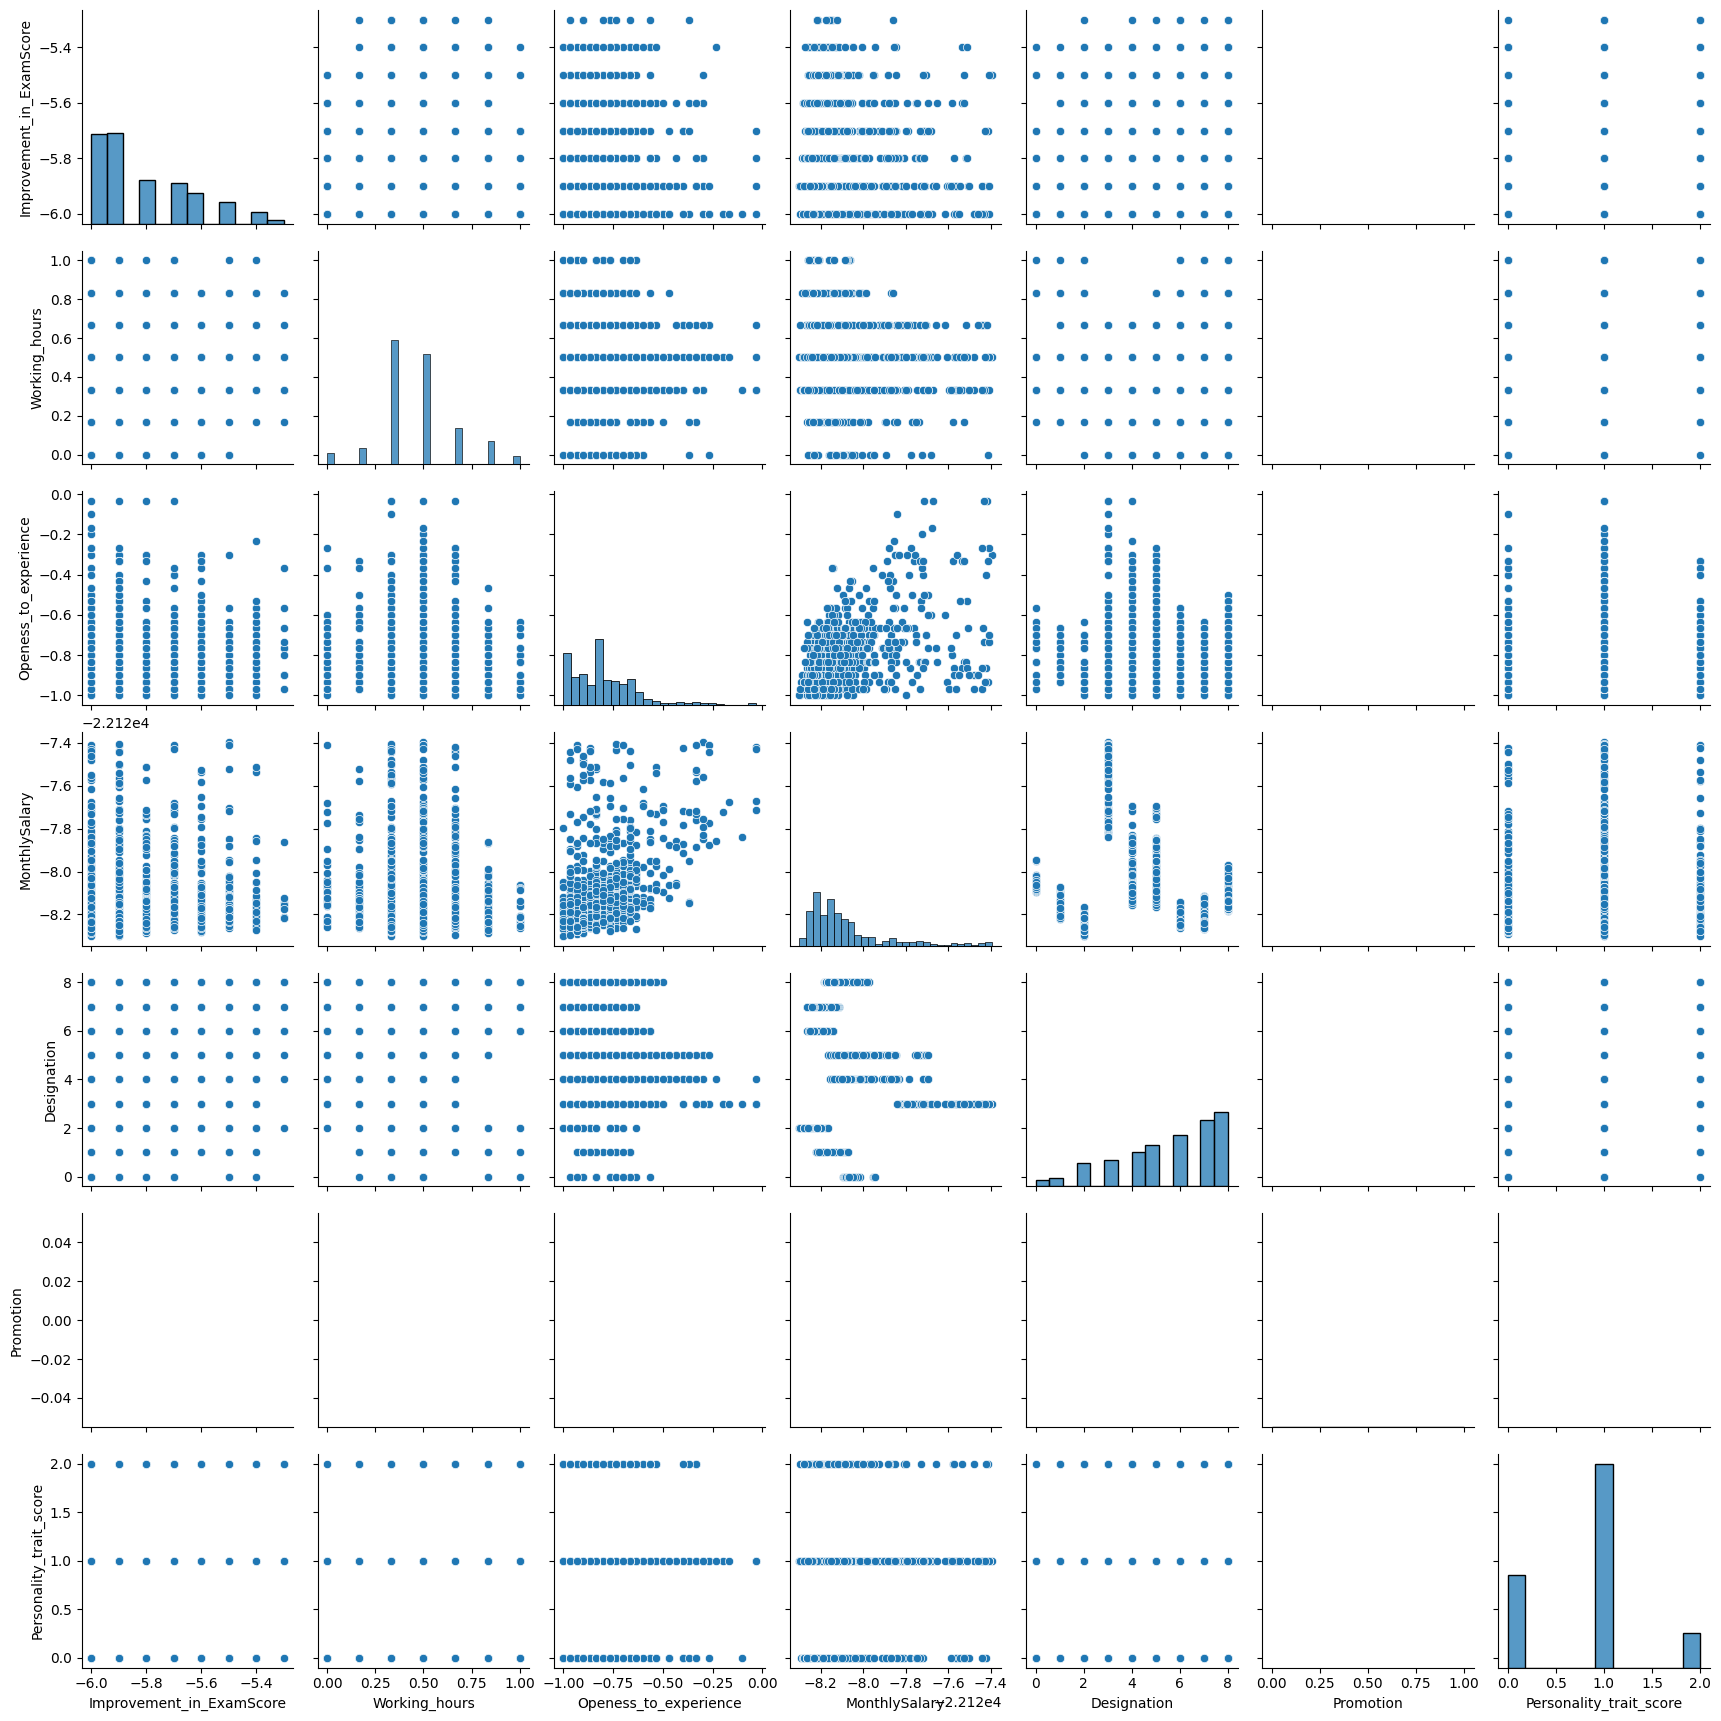

In [7]:
sns.pairplot(new_info)

<Axes: >

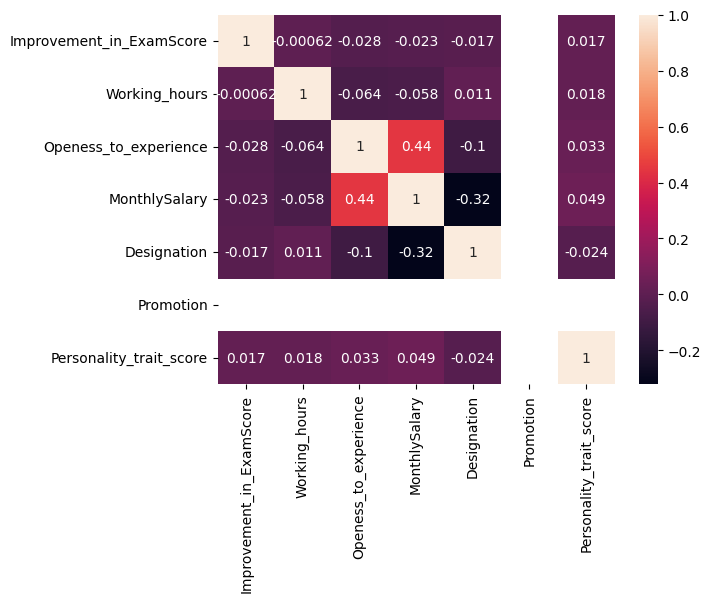

In [8]:
sns.heatmap(new_info.corr(), annot=True)

Data Mining preparation for Unsupervised Learning Model

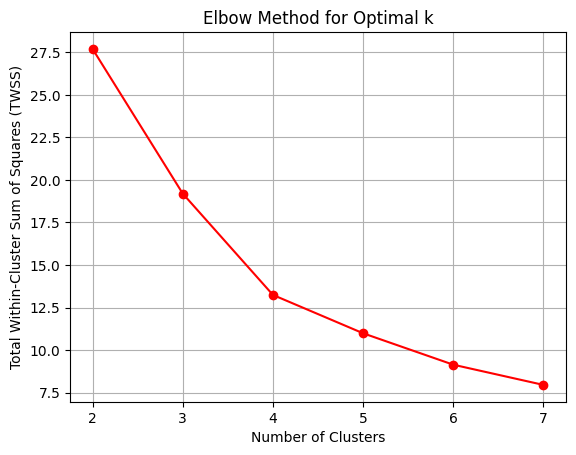

In [9]:


# Assuming new_info_data is your dataset for K-means clustering
# Initialize variables
TWSS = []  # Total Within-Cluster Sum of Squares
k = list(range(2, 8))  # Range of cluster numbers to try

# Fit KMeans and calculate TWSS for each k
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)  # You might want to set a random_state for reproducibility
    kmeans.fit(new_info_data)  # Fit the model to your data
    TWSS.append(kmeans.inertia_)  # Append the total inertia (TWSS)

# Scree plot
plt.plot(k, TWSS, 'ro-')  # 'ro-' for red circle markers and a line
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

Application of K-Means Clustering on the data

Using K-Means to cluster the data with 3 clusters and maximum iteration of 300 we have arrived to our scatter plot as seen on the image below. The data is been clustered to those with low Openness_to_experience, and MonthlySalary, medium Openness_to_experience and MonthlySalary, and high Openness_to_experience, and MonthlySalary. 
Input:


Initialization complete
Iteration 0, inertia 27.33138535818997.
Iteration 1, inertia 22.375148970948313.
Iteration 2, inertia 21.816705934601575.
Iteration 3, inertia 21.63028547283144.
Iteration 4, inertia 21.537934752194868.
Iteration 5, inertia 21.53654807996057.
Converged at iteration 5: strict convergence.


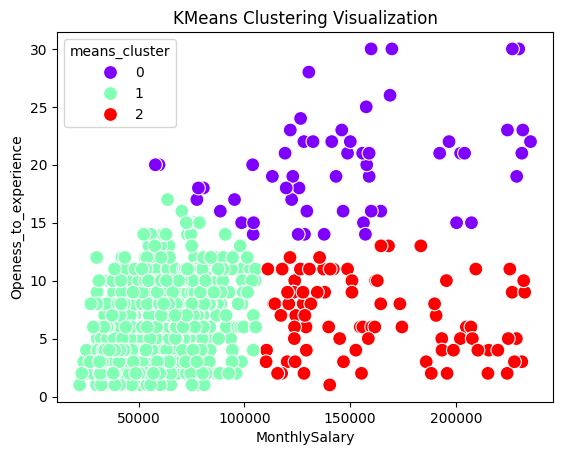

In [10]:
# Assuming new_info_data is correctly defined and clean
kmeans = KMeans(n_clusters=3, max_iter=300, verbose=1)
identified_clusters = kmeans.fit_predict(new_info_data)

# Creating a copy for plotting
data_cluster = data.copy()
data_cluster['means_cluster'] = identified_clusters

# Plotting the scatter plot
sns.scatterplot(data=data_cluster, 
                 x='MonthlySalary', 
                 y='Openess_to_experience', 
                 hue='means_cluster', 
                 palette='rainbow', 
                 s=100)

# Show plot
plt.title('KMeans Clustering Visualization')
plt.show()

Application of Semi-supervised Learning to the Clustered Data
	
	After performing the unsupervised model, we will move to supervised model – our objective is to make a semi – supervised model. From the “dataset_cluster” from the previous model we will start creating a supervised model

Data Preparation for Supervised Model
	
	As we can see from our pair plot during the data clustering – its been observed that ‘Designation’, Improvement_in_ExamScore’, ‘Working_hours’, ‘Personality_trait_scrore’, and ‘Promotion’ are actually discrete data. Therefore, using one-hot encoding we can get a better accuracy of our target cluster. 



In [11]:
# Assuming 'data' is your DataFrame already defined
# Map Promotion values
supervised_data_promotion = data['Promotion'].map({'No': 0, 'Yes': 1})

# Create dummy variables for specified columns
supervised_data_onehot = pd.get_dummies(data=data, 
                                         columns=['Designation', 'Improvement_in_ExamScore', 'Working_hours', 'Personality_trait_score'])

# Apply Min-Max scaling for specific columns (adjust column indices as per your DataFrame)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 7:9]), columns=['Scaled_Column_1', 'Scaled_Column_2'])

# Concatenate all pieces together
supervised_data = pd.concat([
    supervised_data_promotion, 
    supervised_data_onehot.iloc[:, :5],  # Include only the first five dummy variables or adjust as needed
    scaled_data
], axis=1)

# Final DataFrame verification
print(supervised_data.head())

  Promotion Promotion EmployeeName  EmployeeID  Openess_to_experience  \
0         0        No      Abigail      100306                     11   
1         1       Yes      Abigail      101687                      1   
2         0        No      Abigail      100012                     10   
3         0        No      Abigail      100287                      4   
4         0        No   Abigail-II      100857                     14   

   MonthlySalary  Scaled_Column_1  Scaled_Column_2  
0      148842.34         0.344828         0.594300  
1       38954.64         0.000000         0.078917  
2       63206.76         0.310345         0.192662  
3       81776.04         0.103448         0.279753  
4       73066.86         0.448276         0.238906  


Data Mining for Supervised Model

We then proceed to splitting the data to train and test using sklearn.preprocessing. the test_size = 30% our whole data while train_data = 70% with a random_state = 123.

In [12]:

# Load your dataset
data = pd.read_excel(r"C:\Users\user\Documents\GitHub\DATA-SCIENCE-PROJECT\Performance.xlsx")

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Print columns to verify they exist
print("Columns in the dataset:", data.columns.tolist())

# Ensure the relevant columns exist
if 'MonthlySalary' in data.columns and 'Openness_to_experience' in data.columns:
    # Data Preprocessing
    new_info_data = data[['MonthlySalary', 'Openness_to_experience']]
    
    # Standardizing the data
    scaler = StandardScaler()
    new_info_data_scaled = scaler.fit_transform(new_info_data)

    # K-Means Clustering
    kmeans = KMeans(n_clusters=3, max_iter=300, verbose=1)
    identified_cluster = kmeans.fit_predict(new_info_data_scaled)  # Fit and predict
    
    # Prepare data for visualization
    dataset_cluster = data.copy()  # Create a copy of the original DataFrame
    dataset_cluster['means_cluster'] = identified_cluster  # Add clustering results

    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='MonthlySalary', y='Openness_to_experience', hue='means_cluster',
                    data=dataset_cluster, palette='rainbow', s=300)
    
    # Customize the plot
    plt.title('Employee Clusters Based on Monthly Salary and Openness to Experience', fontsize=16)
    plt.xlabel('Monthly Salary', fontsize=12)
    plt.ylabel('Openness to Experience', fontsize=12)
    plt.legend(title='Cluster', fontsize=12)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot

    # Preparing for supervised learning
    supervised_data_x = dataset_cluster.loc[:, dataset_cluster.columns != 'means_cluster']  # Features
    supervised_data_y = dataset_cluster.loc[:, 'means_cluster']  # Target variable

    # Split the data into training and testing sets
    train_x, test_x = train_test_split(supervised_data_x, test_size=0.3, random_state=123)
    train_y, test_y = train_test_split(supervised_data_y, test_size=0.3, random_state=123)

    # Output the shapes of the resulting datasets
    print("\nTraining features shape:", train_x.shape)
    print("Testing features shape:", test_x.shape)
    print("Training target shape:", train_y.shape)
    print("Testing target shape:", test_y.shape)

else:
    print("One or both of the required columns are missing in the dataset.")

Columns in the dataset: ['Promotion', 'EmployeeName', 'EmployeeID', 'Designation', 'Improvement_in_ExamScore', 'Working_hours', 'Personality_trait_score', 'Openess_to_experience', 'MonthlySalary']
One or both of the required columns are missing in the dataset.


Data Modeling for Supervised Model

We now must decide on the modelling algorithms that we want to apply. The goal of our model is to use a set of employee characteristics to label him/her on what cluster he/she belongs that will help to identify if he/she is a good fit for the project. Essentially, we are looking for supervised learning algorithms that perform "classification". The following are a few algorithms that meet these criteria:

	Logistic Regression

	Decision Tree Classifier

	KNeighbors Classifier

	Naive Bayes Classifier using GaussianNB and MultinomialNB

	RandomForestClassifier

	AdaBoostClassifier

	XGBClassifier

I ultimately selected these techniques because they are relatively simple to understand.



In [13]:

# Load your data - Example path
# supervised_data = pd.read_csv('path_to_your_file.csv')

# Ensure the target variable exists
target_variable = 'Promotion'  # Use 'Promotion' as the target variable
if target_variable not in supervised_data.columns:
    raise KeyError(f"Target variable '{target_variable}' not found in the dataset. Available columns: {supervised_data.columns.tolist()}")

# Remove any duplicate 'Promotion' columns if found
supervised_data = supervised_data.loc[:, ~supervised_data.columns.duplicated()]

# Define independent and target variables
X = supervised_data.drop(target_variable, axis=1)  # Features
y = supervised_data[target_variable]  # Target

# Split the dataset into training and testing
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)

# Identify categorical columns for preprocessing
categorical_cols = train_x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_x.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline with One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols),
    ]
)

# Define models including Random Forest and Logistic Regression
models = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(multi_class="multinomial", solver="saga")),
    ]),
    'Random Forest Classifier': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100)),
    ]),
    'Decision Tree Classifier': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=3)),
    ]),
    'K-NN Classifier': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=7)),
    ]),
    'Gaussian Naive Bayes': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB()),
    ]),
    'Multinomial Naive Bayes': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', MultinomialNB()),
    ]),
    'AdaBoost Classifier': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier()),
    ]),
    'XGBoost Classifier': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ]),
}

# Fit models and print accuracies, confusion matrices, and classification reports
for model_name, model in models.items():
    model.fit(train_x, train_y)  # This will handle preprocessing internally
    train_accuracy = model.score(train_x, train_y)
    test_accuracy = model.score(test_x, test_y)
    predictions = model.predict(test_x)

    # Print formatted accuracies
    print(f'Accuracy of {model_name} on training set: {train_accuracy:.2f}')
    print(f'Accuracy of {model_name} on test set: {test_accuracy:.2f}')

    # Print confusion matrix and classification report

Accuracy of Logistic Regression on training set: 0.67
Accuracy of Logistic Regression on test set: 0.64
Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.73
Accuracy of Decision Tree Classifier on training set: 0.74
Accuracy of Decision Tree Classifier on test set: 0.69
Accuracy of K-NN Classifier on training set: 0.76
Accuracy of K-NN Classifier on test set: 0.68
Accuracy of Gaussian Naive Bayes on training set: 0.65
Accuracy of Gaussian Naive Bayes on test set: 0.64
Accuracy of Multinomial Naive Bayes on training set: 0.68
Accuracy of Multinomial Naive Bayes on test set: 0.65
Accuracy of AdaBoost Classifier on training set: 0.73
Accuracy of AdaBoost Classifier on test set: 0.76
Accuracy of XGBoost Classifier on training set: 1.00
Accuracy of XGBoost Classifier on test set: 0.71


# Model Evaluation


| Model                              | Train Score | Test Score |
|------------------------------------|-------------|------------|
| Logistic Regression                | 0.67        | 0.64       |
| Random Forest Classifier           | 1.00        | 0.74       |
| Decision Tree Classifier           | 0.74        | 0.69       |
| K-NN Classifier                    | 0.76        | 0.68       |
| Gaussian Naive Bayes               | 0.65        | 0.64       |
| Multinomial Naive Bayes            | 0.68        | 0.65       |
| AdaBoost Classifier                | 0.73        | 0.76       |
| XGBoost Classifier                 | 1.00        | 0.71       |

# Best Performer: 
AdaBoost Classifier shows the best balance by achieving a higher test score than training score, suggesting good generalization.
# Concern for Overfitting: 
Both Random Forest and XGBoost models show signs of overfitting, which may need to be addressed through techniques such as cross-validation, hyperparameter tuning, or pruning.
# Areas for Improvement: 
Models like Naive Bayes variants require further analysis or feature engineering to enhance their predictive capabilities.